<a href="https://colab.research.google.com/github/bootstrap666/processamentodigitaldesinais2021Amostragem/blob/main/Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considere o sinal analógico
$$x(t) = 3 \cos(2000 \pi t) + 5 \sin (6000 \pi t) + 10 \cos (12000 \pi t)$$

a) Qual é a menor frequência de amostragem que pode ser utilizada para obter a reconstrução perfeita do sinal $x(t)$ (assumindo um processo de amostragem uniforme)?

b) Considere que $x(t)$ foi amostrado a $F_\mathrm{s} = 5000$ Hz. Determine o sinal $x[n]$ obtido após o processo de amostragem.

c) Determine o sinal $y(t)$ obtido após a reconstrução do sinal $x[n]$ determinado no item anterior (considere um modelo de sinal do tipo passa-baixa)

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [3]:
# Função criada para gerar os dados de entrada em diversas frequências de amostragem. 
# t contém um array com os instantes de amostragem
def x(t):
  return 3.0*np.cos(2000.0*np.pi*t) + 5.0*np.sin(6000.0*np.pi*t) + 10.0*np.cos(12000.0*np.pi*t)  

Inicialmente, visualizando $x(t)$ por meio de um gráfico

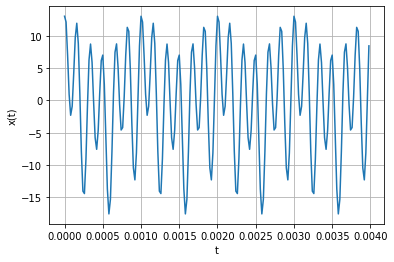

In [4]:
fs_visualizacao = 50000  # Uma frequência de amostragem absurdamente alta (para essa aplicação). 
                          # Utilizada apenas para visualização do sinal.
T = 200/fs_visualizacao  # 200 amostras de sinal na frequencia de amostragem para visualizacao
t_visualizacao = np.arange(0, T, 1/fs_visualizacao)
x_visualizacao = x(t_visualizacao)

fig = plt.figure()

plt.plot(t_visualizacao,x_visualizacao)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid('both')

plt.show()

O problema pede a amostragem do sinal com uma frequência de amostragem de 5k amostras/s. O seguinte código gera esse sinal amostrado e produz um gráfico do sinal. Observa-se que seria impossível recuperar a informação integral do sinal analógico a partir do sinal amostrado com essa frequência de amostragem.

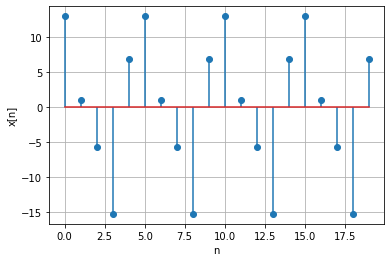

In [5]:
fs = 5000                 # Frequência de amostragem fornecida pelo problema. 
                          # Note que ela é inferior à frequência de Nyquist.
t_amostrado = t = np.arange(0, T, 1/fs)
x_amostrado = x(t_amostrado)

fig = plt.figure()

plt.stem(x_amostrado,use_line_collection=True)

plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid('both')

plt.show()

Utiliza a função resample para tentar reproduzir o sinal analógico a partir das amostras determinadas anteriormente. Observa-se que o sinal recuperado é diferente do sinal analógico original.

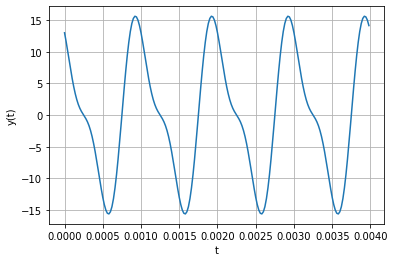

In [6]:
x_recuperado = signal.resample(x_amostrado,len(t_visualizacao))  # Reconstrução do sinal simulada por meio de um processo de reamostragem em uma frequência de amostragem elevada.

fig = plt.figure()

plt.plot(t_visualizacao, x_recuperado)

#plt.stem(t_amostrado,x_amostrado,'r',use_line_collection=True)

plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid('both')

plt.show()

Produz o sinal reconstruído a partir da resposta da parte conceitual do exercício. Observa-se que a previsão e a simulação são iguais ou muito parecidas. Gerar um gráfico de uma sobreposta a outra pode indicar se existe alguma diferença disfarçada por paralaxe.

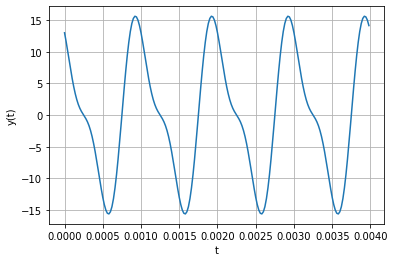

In [7]:
# Sinal reconstruído determinado teoricamente

y = 13.0*np.cos(2000.0*np.pi*t_visualizacao) - 5.0*np.sin(4000.0*np.pi*t_visualizacao)

fig = plt.figure()

plt.plot(t_visualizacao, y)

#plt.stem(t_amostrado,x_amostrado,'r',use_line_collection=True)

plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid('both')

plt.show()

Cria uma sobreposição dos gráficos do sinal recuperado pela previsão teórica e pela simulação com a função resample. Fora erros de aritmética de precisão finita, a previsão teórica tem uma precisão bastante elevada.

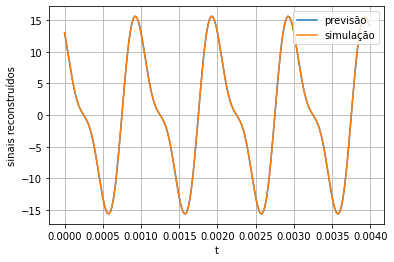

In [8]:
# Comparação entre os sinais determinados teoricamente e do processo de simulação
fig = plt.figure()

plt.plot(t_visualizacao, y, label='previsão')
plt.plot(t_visualizacao, x_recuperado, label='simulação')


plt.xlabel('t')
plt.ylabel('sinais reconstruídos')
plt.grid('both')
plt.legend()

plt.show()